## Анализ продаж игр для игровых консолей в различных регионах.
Выявить определяющие успешность игры закономерности.

#### Содержание   
* [Шаг 1. Изучение общей информации](#cell1)   
* [Шаг 2. Подготовка данных](#cell2)   
* [Шаг 3. Анализ данных](#cell3)   
* [Шаг 4. Составление портрета пользователя каждого региона](#cell4)  
* [Шаг 5. Проверка гипотез](#cell5)   
* [Шаг 6. Общий вывод](#cell6)   

### Шаг 1. Изучение общей информации <a id="cell1"></a>

In [1]:
# импорт библиотек
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# показ всех колонок
pd.set_option('display.max_columns', 40)

orders = pd.read_csv('games.csv')
data = orders.copy()  # сделаем копию, для возможности откатить результат назад при редактировании данных

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Требует доработки: названия колонок с большой буквы, тип данных столбцов 'Year_of_Release', 'User_Score' требует замены, наличие пропусков.

In [3]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Данные представлены с 1980 по 2016 год.

In [4]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Пропуски в столбцах 'Name', 'Year_of_Release','Genre','Critic_Score','User_Score','Rating'.

In [5]:
data.corr().style.background_gradient(cmap = 'coolwarm')

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1,-0.0925004,0.00397783,-0.168366,0.0378202,0.011411
NA_sales,-0.0925004,1,0.765335,0.449594,0.638649,0.240755
EU_sales,0.00397783,0.765335,1,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1,0.291089,0.152593
Other_sales,0.0378202,0.638649,0.722792,0.291089,1,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1


Наблюдается средняя зависимость между  продажами в Европе, Америкой, и продажами в прочих регионах.

### Вывод

Данные представлены с 1980 по 2016 год. Продажи в Америке, Европе и других странах схожи.
План для подготовки данных:   
- замена названия столбцов (приведение к нижнему регистру)   
- замена типа данных   
- обработка пропусков

### Шаг 2. Подготовка данных <a id="cell2"></a>

##### 2.1 Замена названия столбцов (приведение к нижнему регистру)

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# перезапишим названия столбцов в нижнем регистре 
data.columns = data.columns.str.lower()

In [8]:
# проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### 2.2 Замена типа данных 

2.2.1 В столбце 'year_of_release' заменим данные на тип int, для этого устраним пропуску.

In [9]:
# посмотрим пропуски
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
# пропусков в 'year_of_release' 269, узнаем их долю от общего числа
print('Доля пропусков "year_of_release" - {:.1%}'.format(data['year_of_release'].isna().mean()))

Доля пропусков "year_of_release" - 1.6%


Такая доля не критична для нашего дата сета. Удалим пропуски. Пропуски могли появиться из-за сбоя в выгрузке или отсутствия данных.

In [11]:
# удаление пропусков
data.dropna(subset = ['year_of_release'], inplace = True)

In [12]:
# замена типа данных
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
# проверим
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int32
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


2.2.2 В столбце 'user_score' заменим данные с типа object на тип float.

In [14]:
# для начала посмотрим уникальные значения
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.2       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

поиск говорит, что значение tbd означает скорую публикацию рейтинга. Заменим значения 'tbd' на пропуски, т.к. оценки нет.

In [15]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

In [16]:
# замена типа данных
data['user_score'] = data['user_score'].astype('float')

In [17]:
data.info() # проверим

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int32
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


##### 2.3 Обработка пропусков.

In [18]:
# посмотрим, какие пропуска остались
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Изучим пропуски в столбце 'name'.

In [19]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
data.dropna(subset = ['name'], inplace = True)

In [21]:
# проверим 
data.isna().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Изучим пропуски в столбцах 'critic_score', 'user_score', 'rating'. Изучим причину пропусков на примере столбца 'critic_score'.

In [22]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


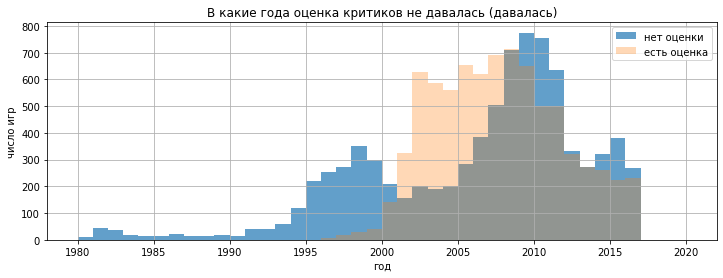

In [23]:
# зависимость пропусков в столбце "оценка критиков" от года выпуска
data[data['critic_score'].isna()]['year_of_release'].hist(bins=40,  figsize = (12,4),range=(1980,2020),alpha = 0.7, label = 'нет оценки')
data[~data['critic_score'].isna()]['year_of_release'].hist(bins=40,  figsize = (12,4),range=(1980,2020),alpha = 0.3, label = 'есть оценка')
plt.title("В какие года оценка критиков не давалась (давалась)")
plt.xlabel("год") 
plt.ylabel("число игр")
plt.legend()
plt.show()

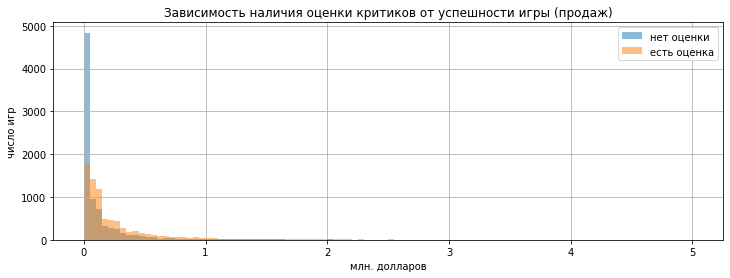

In [24]:
# зависимость пропусков в столбце "оценка критиков" от продаж в Северной Америке
data[data['critic_score'].isna()]['na_sales'].hist(bins=100,  figsize = (12,4),range=(0,5),alpha = 0.5, label = 'нет оценки')
data[~data['critic_score'].isna()]['na_sales'].hist(bins=100,  figsize = (12,4),range=(0,5),alpha = 0.5, label = 'есть оценка')
plt.title("Зависимость наличия оценки критиков от успешности игры (продаж)")
plt.xlabel("млн. долларов") 
plt.ylabel("число игр")
plt.legend()
plt.show()

На примере столбца 'critic_score', можно сказать, что рейтинги возникли позже создания первых игр и в рейтинги реже попадают малоизвестные, низкоприбыльные игры. Оставим пропуски во всех рейтингах, как есть.  

Проверим наличие дубликатов

In [25]:
data.duplicated().sum()

0

##### 2.4  Определение суммарных продаж во всех регионах

In [26]:
# создадим столбец с суммарными продажами, сложим продажи всех регионов
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


##### 2.5  Очистка данных. 

2.5.1 Изучим уникальные значения столбца 'rating'

In [28]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В википедия дает расшифровку групп. Малочисленные группы относятся к редким категориям (игры только для взрослых, маленьких детей и др.). Т.к. их очень мало, анализировать будем только основные группы. Перезапишим дата фрейм. 

In [29]:
# исключим из рейтинга категории с наименьшим колличеством
data = data[~data['rating'].isin(('EC','K-A','RP','AO'))]

In [30]:
# проверим
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

### Вывод

Данные подготовлены. Значение tbd в столбце 'user_score' преобразованы в пропуски. Пропуски остались в столбцах 'critic_score', 'user_score', 'rating'. Создан столбец 'sum_sales' с суммарными продажами во всех регионах.

### Шаг 3. Анализ данных <a id="cell3"></a>

##### 3.1 Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

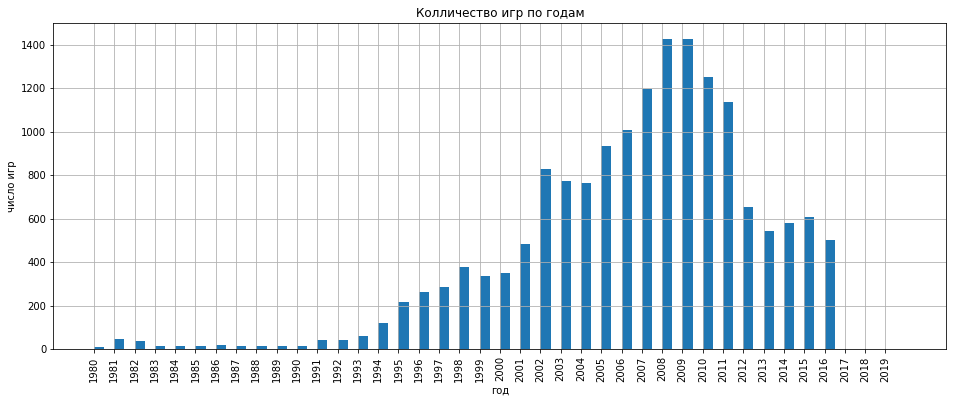

In [31]:
# построим гистограмму числа выпущенных игр в определенный год
data['year_of_release'].hist(bins=80,  figsize = (16,6),range=(1980,2020))
plt.title("Колличество игр по годам")
plt.xlabel("год") 
plt.ylabel("число игр")
x_ticks = np.arange(1980, 2020, 1) # по оси х устновим частоту значений с 1980 по 2020 с шагом 1
plt.xticks(x_ticks,rotation = 90) # применим деление и повернем значения на 90 градусов
plt.show()

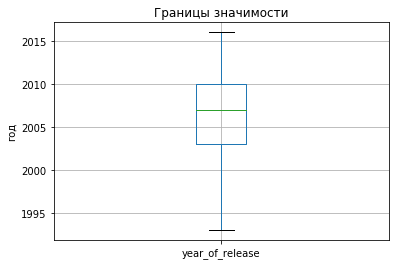

In [32]:
# посмотрим все ли значения укладываются в "ящик с усами"
data.boxplot('year_of_release', showfliers=False)
plt.title("Границы значимости")
plt.ylabel("год")
plt.show()

In [33]:
# посмотрим какие плотформы были локомотивом в период с наибольшим выпуском игр
data.query('2007 <= year_of_release <= 2011')['platform'].value_counts()

DS      1745
Wii     1186
X360     829
PS3      786
PSP      721
PS2      546
PC       471
3DS      116
PSV       18
GBA        6
XB         4
GC         4
DC         2
Name: platform, dtype: int64

платформы DS и Wii - это приставки компании нинтендо карманного типа. Видно была сделана ставка на развитие данного направления. Игры менее затратные и простые в производстве, чем для стационарных приставок.   

In [34]:
# посмотрим почему пошел спад после 2012 года
data.query('2012 <= year_of_release <= 2016')['platform'].value_counts()

PS3     493
PSV     411
3DS     396
PS4     392
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

колличество игр на карманных устройствах упали и сравнялись со стационарными. Можно предположить несколько причин: рост числа мобильных игр, заменяющих карманные приставки, качество и уровень игр стационарных приставок намного выше, сложности в компании нинтендо. 

Графики показывают, что с 1980 по 1993 индустрия зарождалась, в эти года выпускалось менее 50 игр в год. С 1994 года наблюдается плавный ежегодный прирост, с пиком в 2008 , 2009 гадах (около 1400 игр в год) и затем спад. 

##### 3.2 Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами распределить по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Построим сводную таблицу и графики, в какой год сколько прибыли получила каждая платформа.

In [35]:
platform_sale = data.pivot_table(index = 'year_of_release', # строки - это года
               columns = 'platform',    # в коланках названия платформ
               values='sum_sales',       
               aggfunc='sum')            # просуммируем продажи по годам по каждой платформе 

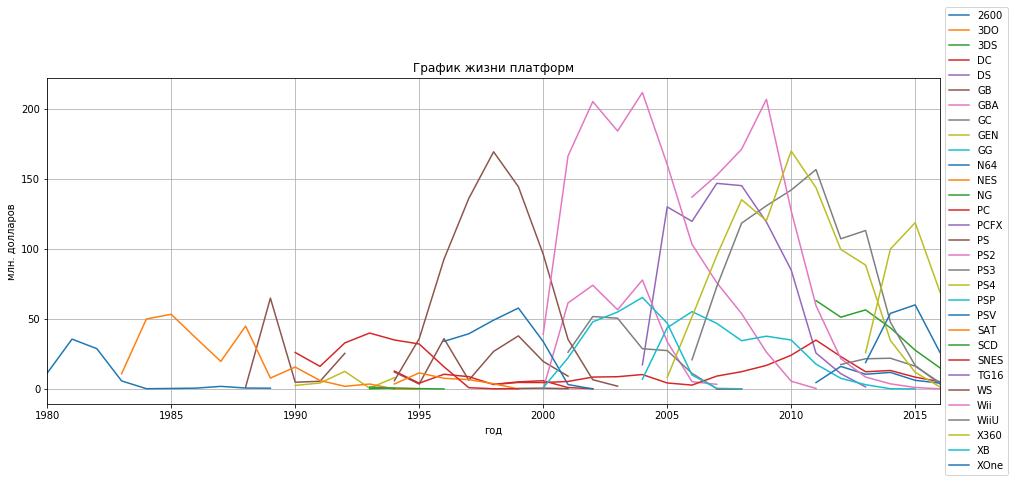

In [36]:
# на основе сводной таблицы построим  график
platform_sale.plot(figsize = (16,6), grid = True)
plt.title("График жизни платформ")
plt.xlabel("год") 
plt.ylabel("млн. долларов")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5 ))
plt.show()

Уже видно, что продолжительность жизни платформ примерно от 5 до 10 лет. с 1995 появляются игры для платформ делающие внушительные продажи.с 2005 наблюдается конкуренция между несколькими платформами. Найдем топовые платформы с наибольшими продажами.  

In [37]:
# сгруппируем данные по платформам и посчитаем продажи за все года 
platform_sum_sales = data.groupby('platform')['sum_sales'].agg(['sum']).sort_values('sum',ascending=False)
# узнаем средние продажи платформы за жизненный цикл
print('среднее значение продаж по всем платвормам', platform_sum_sales['sum'].mean())

среднее значение продаж по всем платвормам 284.0741935483858


In [38]:
# изучим платформы где сумма продаж больше 300(немного больше среднего)
platform_sum_sales[platform_sum_sales['sum'] > 300]

,sum
platform,
PS2,1233.32
X360,961.24
PS3,931.34
Wii,890.52
DS,802.13
PS,725.67
PS4,314.14
GBA,312.88


In [39]:
# оставим топовые платформы по продажам
data_top = data[data['platform'].isin(('PS2','X360','PS3','Wii','DS','PS','PS4','GBA'))]
data_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [40]:
# сгруппируем новую таблицу данных по платформам и годам и высчитаем продажи
top_sale = data_top.pivot_table(index = 'year_of_release',
               columns = 'platform',
               values='sum_sales',
               aggfunc='sum') 
# выведем статистику по группировке топовых платформ, нам важны значения 'count' - колличество лет существования платформы
top_sale.describe()

platform,DS,GBA,PS,PS2,PS3,PS4,Wii,X360
count,11.000000,8.000000,10.000000,12.000000,11.000000,4.000000,11.000000,12.000000
mean,72.920909,39.110000,72.567000,102.776667,84.667273,78.535000,80.956364,80.103333
std,61.692366,32.768255,63.281049,79.389859,54.637565,40.567917,79.097428,57.484408
min,0.020000,0.070000,2.070000,0.450000,3.600000,25.990000,0.180000,1.520000
25%,14.140000,4.810000,13.900000,35.977500,34.360000,58.435000,6.170000,29.045000
50%,85.020000,45.265000,64.375000,89.705000,107.360000,84.625000,59.650000,91.995000
75%,124.975000,64.687500,126.220000,170.900000,124.725000,104.725000,144.960000,124.032500
max,146.940000,77.910000,169.490000,211.810000,156.780000,118.900000,206.970000,170.030000


Укрутых платформ срок жизни около 10 лет. Самая успешная платформа PS2, самые большие продажи за весь период - 1233.32 млн. и максимальная продажа за год - 211.8 млн.

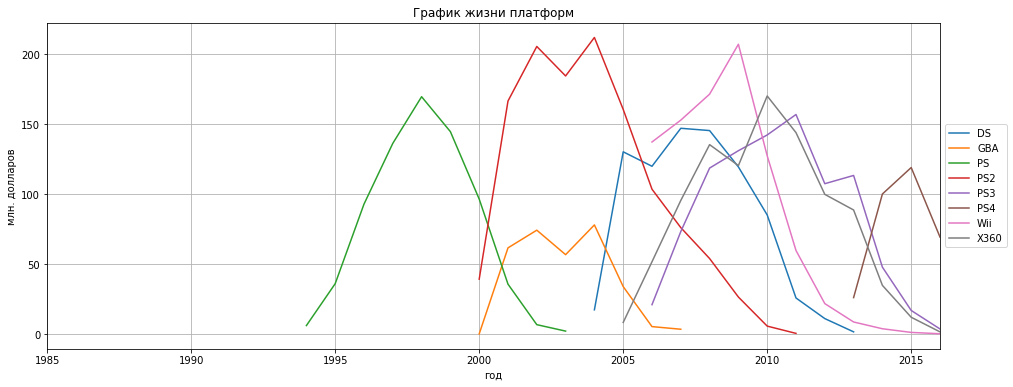

In [41]:
# построим  график продаж по годам для топовых платформ
top_sale.plot(figsize = (16,6), grid = True)
plt.title("График жизни платформ")
plt.xlabel("год") 
plt.ylabel("млн. долларов")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5 ))
plt.show()

Жизненный цикл платформа похож на нормальное распределение с удлинненым хвостом. 1-3 года платформа раскручивается, 1-3 года находится на пике и 3-5 лет идет спад и устаревание платформы. В 2005-2010 году на пик популярности вышли корманные приставки и показали достойный результат продаж.   

##### 3.3 Определение актуального периода, для построения прогноза на 2017 год.

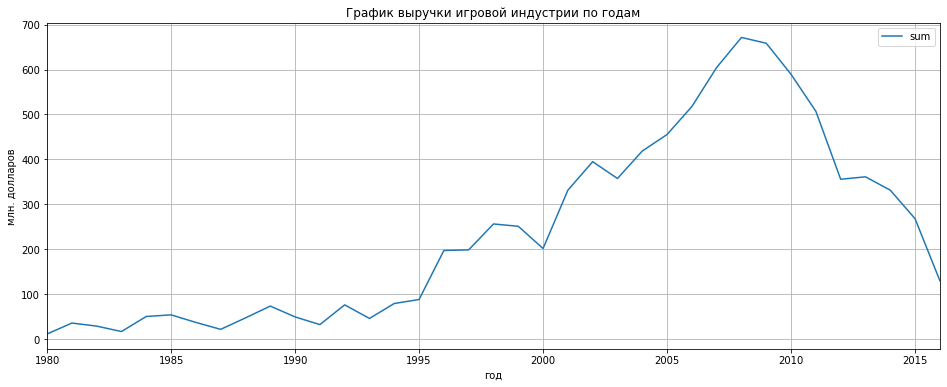

In [42]:
# выведем график продаж всех платформ по годам
(data.groupby('year_of_release')['sum_sales']
                     .agg(['sum'])
                     .sort_values('year_of_release',ascending=False)
                     .plot(figsize = (16,6), grid = True))
plt.title("График выручки игровой индустрии по годам")
plt.xlabel("год") 
plt.ylabel("млн. долларов")
plt.show()

С 2010 года наблюдается тренд на снижение объемов продаж. Мобильные игры оттянули на себя основную массу игроков, а дорогие, качественные, консольные игры доступны не всем. Из предыдущих данных мы знаем что средний срок жизни топовых платформ 10 лет. Для нас будет актуальной информация половина этого срока. Сделаем срез с 2010 года.

In [43]:
relevant_data = data.query('year_of_release >= 2010')

##### 3.4 Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

In [44]:
# на срезе с 2010 сгруппируем таблицу данных по платформам и годам и высчитаем продажи
relevant_sale = relevant_data.pivot_table(index = 'year_of_release',
               columns = 'platform',
               values='sum_sales',
               aggfunc='sum') 
relevant_sale

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,85.02,24.19,5.64,142.17,NaN,35.04,NaN,127.29,NaN,170.03,NaN
2011,63.20,25.73,34.99,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Судя по последним 2 годам.Умершие платформы - DS, PS2, PSP. Падают, на грани вымирания PS3, Wii, X360. К перспективным отнесем PS4, XOne, 3DS

In [45]:
# рассмотрим прибыль за 2015 год , ближайший полноценный год для нашего исследования и отсортируем по убыванию
(data.query('year_of_release == 2015')
             .groupby('platform')['sum_sales']
             .agg(['sum'])
             .sort_values('sum',ascending=False)
            )

,sum
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


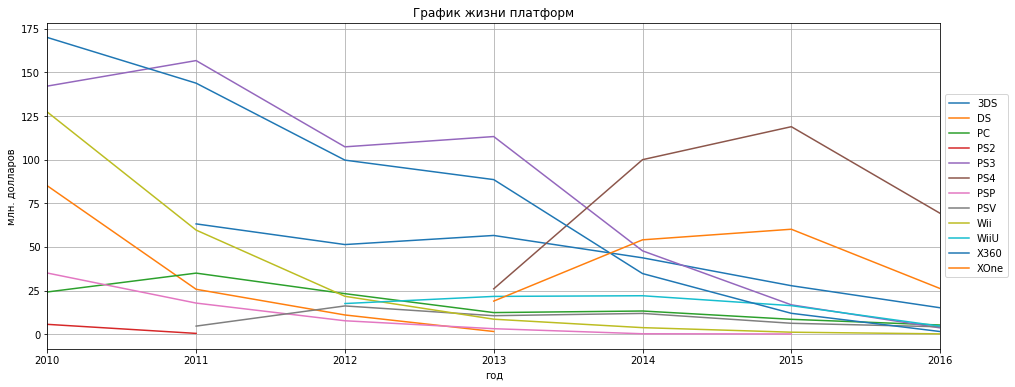

In [46]:
# посмотрим наши выводы на  графике
relevant_sale.plot(figsize = (16,6), grid = True)
plt.title("График жизни платформ")
plt.xlabel("год") 
plt.ylabel("млн. долларов")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5 ))
plt.show()

В потенциально прибыльных платформ оставляем PS4, XOne, 3DS

##### 3.5 Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [47]:
# сделаем срез данных по актуальным платформам
actual_platforms = data[data['platform'].isin(('PS4','XOne','3DS'))]
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


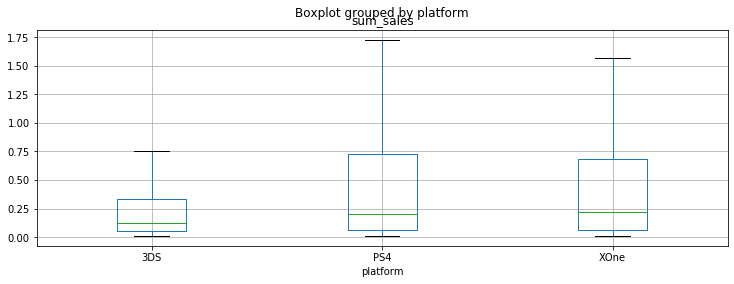

In [48]:
# построим график «ящик с усами» по продажам игр с разбивкой по платформам
actual_platforms.boxplot(column='sum_sales', by='platform', showfliers=False,  figsize = (12,4))

Для лучшего понимания и наглядности выведем дополнительно гистограмму продаж по каждой плотформе и методом describe() - статистические показатели.

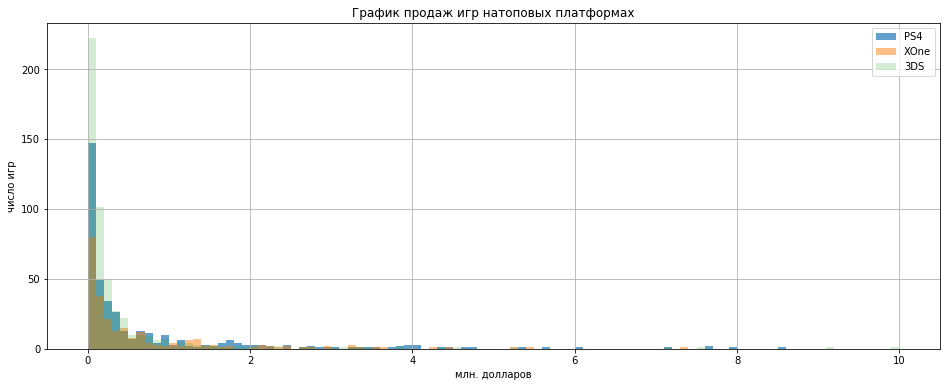

In [49]:
# График продаж игр на топовых платформах
data.query('platform == "PS4"')['sum_sales'].hist(bins=100,  figsize = (16,6),range=(0,10),alpha = 0.7, label = 'PS4')
data.query('platform == "XOne"')['sum_sales'].hist(bins=100,  figsize = (16,6),range=(0,10),alpha = 0.5, label = 'XOne')
data.query('platform == "3DS"')['sum_sales'].hist(bins=100,  figsize = (16,6),range=(0,10),alpha = 0.2, label = '3DS')
plt.title("График продаж игр натоповых платформах")
plt.xlabel("млн. долларов") 
plt.ylabel("число игр")
plt.legend()
plt.show()

In [50]:
# сгруппируем платформы и по продажам выведем статистику
actual_platforms.groupby(['platform'])['sum_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


In [51]:
# добавим суммарные продажи по платформам
actual_platforms.groupby(['platform'])['sum_sales'].agg('sum')

platform
3DS     257.81
PS4     314.14
XOne    159.32
Name: sum_sales, dtype: float64

Платформы PS4 и XOne вышли в 2013г., а 3DS в 2011г. Платформы PS4 и XOne борятся на рынке настольных приставок, а 3DS заняло нишу карманных игр. По общей прибыли за время существования лидирует PS4 314 млн (в среднем 78.5 млн $ в год), затем прилично отстает 3DS 257 млн (в среднем 46 млн в год) и рядышком идет XOne 159 млн (в среднем 40 млн в год).   
Графики платформ PS4 и XOne примерно схожи, у них длинный верхний ус в boxplot и длинный хвост на гистограмме - это означает, что игр с хорошими продажами большое колличество. Этот факт нам подтверждает и разница между медианой, и средним значением (медиана: PS4-0.2, XOne-0.22 среднее - PS4-0.8, XOne-0.64). Разница в 3-4 раза говорит, что игры артефакты около 25 %, делают нам половину продаж.   
Для платформы 3DS медиана равна 0.12, а среднее = 0.5 - эти показатели ниже, чем у приставок PS4 и XOne, но разница в 4 раза сохраняется. На платформе 3DS тоже есть игры легенды. Для платформы 3DS самое большое число игр, что и сказалось на снижении средней величины и медианы.
Неплохо бы наполнить магазин популярными играми, делающие основную выручку компаниям разработчикам.  
Предположив что цена на покупку игры  примерно одинакова и погуглив обьем рынка проданных приставок, можно предположить, что приставок 3DS и PS4 продано примерно поровну(максимальные продажи 1 игры равна 14.60), а приставок XOne примерно в 2 раза меньше.

###### 3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для исследования возьмем PS4.

In [52]:
# в переменной сохраним срез данных
ps_4 = data.query('platform == "PS4"')

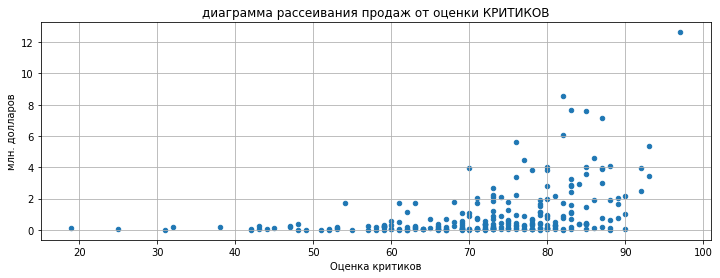

In [53]:
# построим диаграмму рассеивания зависимости продаж от оценки критиков
ps_4.plot(x='critic_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True)
plt.title("диаграмма рассеивания продаж от оценки КРИТИКОВ")
plt.xlabel("Оценка критиков") 
plt.ylabel("млн. долларов")
plt.show()

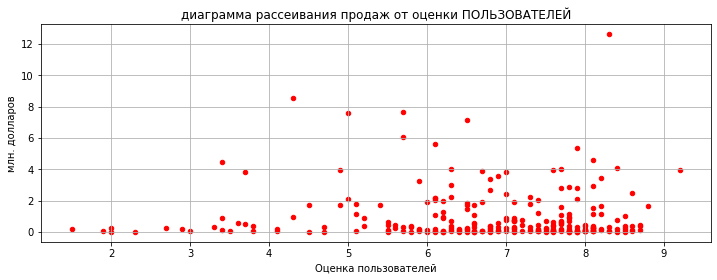

In [54]:
# построим диаграмму рассеивания зависимости продаж от оценки оценки пользователей
ps_4.plot(x='user_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True, color = 'red')
plt.title("диаграмма рассеивания продаж от оценки ПОЛЬЗОВАТЕЛЕЙ")
plt.xlabel("Оценка пользователей") 
plt.ylabel("млн. долларов")
plt.show()

In [55]:
# найдем корреляцию для требуемых столбцов
ps_4[['critic_score','user_score','sum_sales']].corr().style.background_gradient(cmap='coolwarm')      

,critic_score,user_score,sum_sales
critic_score,1,0.557654,0.406568
user_score,0.557654,1,-0.0319571
sum_sales,0.406568,-0.0319571,1


И по диаграмме и по корреляции видно, что оценка критиков не вовсех случаях, но положительно влияет на продажи. Игр с плохой оценкой критиков и хорошими продажами нет. С хорошой оценкой критиков встречаются разные игры, возможно зависит от жанра игры(игра хорошая, но жанр не популярный).   
Оценка же пользователей вообще имеет 0 корреляцию. Явной зависимости нет, и верить оценки пользователей нельзя, их мнение очень субъективно.

##### 3.7 Соотнесите выводы с продажами игр на других платформах.

Для платформы XOne.

In [56]:
xone = data.query('platform == "XOne"')

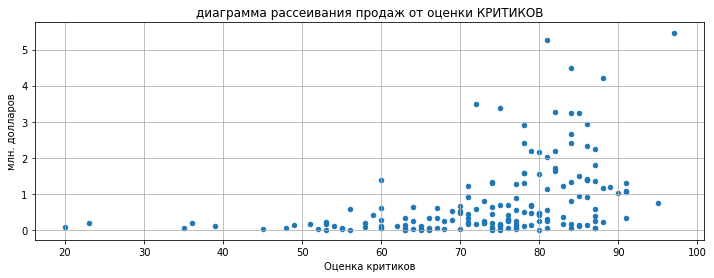

In [57]:
# построим диаграмму рассеивания зависимости продаж от оценки критиков
xone.plot(x='critic_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True)
plt.title("диаграмма рассеивания продаж от оценки КРИТИКОВ")
plt.xlabel("Оценка критиков") 
plt.ylabel("млн. долларов")
plt.show()

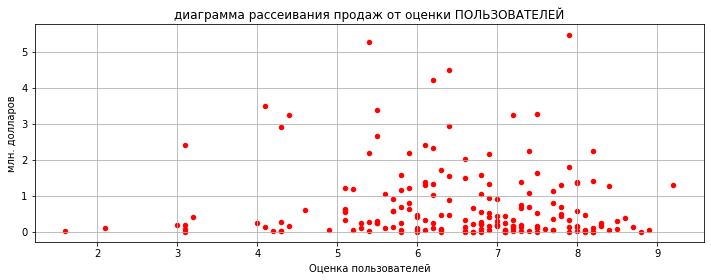

In [58]:
# построим диаграмму рассеивания зависимости продаж от оценки оценки пользователей
xone.plot(x='user_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True, color = 'red')
plt.title("диаграмма рассеивания продаж от оценки ПОЛЬЗОВАТЕЛЕЙ")
plt.xlabel("Оценка пользователей") 
plt.ylabel("млн. долларов")
plt.show()

In [59]:
# найдем корреляцию для требуемых столбцов
xone[['critic_score','user_score','sum_sales']].corr().style.background_gradient(cmap='coolwarm') 

,critic_score,user_score,sum_sales
critic_score,1,0.472462,0.416998
user_score,0.472462,1,-0.0689251
sum_sales,0.416998,-0.0689251,1


Для платформы XOne выводы схожи с платформой PS4

Для платформы 3DS.

In [60]:
ds_3 = data.query('platform == "3DS"')

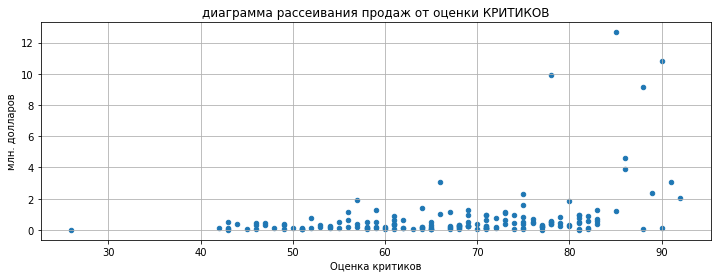

In [61]:
# построим диаграмму рассеивания зависимости продаж от оценки критиков
ds_3.plot(x='critic_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True)
plt.title("диаграмма рассеивания продаж от оценки КРИТИКОВ")
plt.xlabel("Оценка критиков") 
plt.ylabel("млн. долларов")
plt.show()

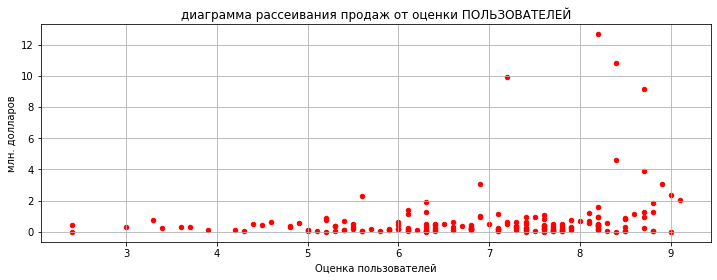

In [62]:
# построим диаграмму рассеивания зависимости продаж от оценки оценки пользователей
ds_3.plot(x='user_score',y='sum_sales', kind='scatter', figsize =(12,4), grid=True, color = 'red')
plt.title("диаграмма рассеивания продаж от оценки ПОЛЬЗОВАТЕЛЕЙ")
plt.xlabel("Оценка пользователей") 
plt.ylabel("млн. долларов")
plt.show()

In [63]:
# найдем корреляцию для требуемых столбцов
ds_3[['critic_score','user_score','sum_sales']].corr().style.background_gradient(cmap='coolwarm') 

,critic_score,user_score,sum_sales
critic_score,1,0.745222,0.34874
user_score,0.745222,1,0.222078
sum_sales,0.34874,0.222078,1


Для платформы 3DS зависимость выручки и оценки критиков поменьше, зато оценка пользователей для этой платформы более реалистична с оценкой рынка, хоть и связь всеравно мала 0.22

###### 3.8 Изучить общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

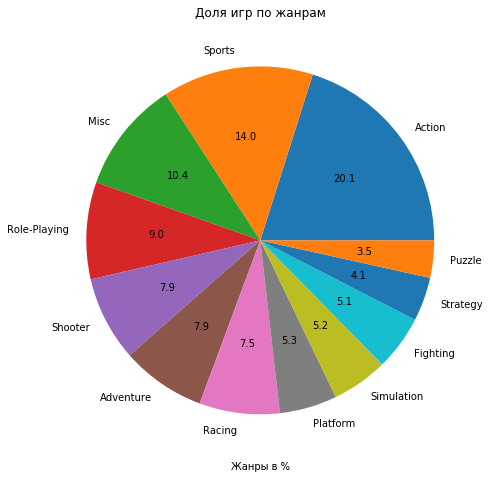

In [64]:
# выведем круговой график доли игр определенного жанра от общего числа
g = data['genre'].value_counts(normalize = True) # уникальные значения в процентах
g.plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля игр по жанрам")
plt.xlabel("Жанры в %") 
plt.ylabel("")
plt.show()

Больше всего игр в жанрах "Action","Sports". Остальные жанры занимают от 3 до 10 %. 

In [65]:
# сгруппируем данные по жанру и посчитаем кол-во игр в жанре, сумму продаж и средную сумму от продажи 1 игры 
data.groupby('genre')['sum_sales'].agg(['count','sum','mean']).sort_values('mean',ascending=False)

,count,sum,mean
genre,,,
Platform,878,825.55,0.940262
Shooter,1296,1041.36,0.803519
Role-Playing,1481,931.08,0.628683
Racing,1226,723.49,0.590122
Sports,2306,1309.67,0.567940
Fighting,837,442.66,0.528865
Action,3305,1714.11,0.518641
Misc,1715,787.43,0.459143
Simulation,857,387.96,0.452695


В лидерах по прибыльности на одну игру у нас жанры "Platform", "Shooter" - 0.8-0.9 млн долларов. В аутсайдер жанры "Strategy", "Adventure" - около 0.2 млн долларов. Остальные жанры в середнечках.

### Вывод

платформы DS и Wii - это приставки компании нинтендо карманного типа. Видно была сделана ставка на развитие данного направления. Игры менее затратные и простые в производстве, чем для стационарных приставок.   
олличество игр на карманных устройствах упали и сравнялись со стационарными. Можно предположить несколько причин: рост числа мобильных игр, заменяющих карманные приставки, качество и уровень игр стационарных приставок намного выше, сложности в компании нинтендо.

С 1980 по 1993 игровая индустрия зарождалась, в эти года выпускалось менее 50 игр в год. С 1994 года наблюдается плавный ежегодный прирост, с пиком в 2008 , 2009 гадах (около 1400 игр в год) и затем спад. Большое колличество игр с 2005-2011 вызвано популярностью карманных приставок, для которых выпускалось много игр.   
Продолжительность жизни платформ составляет примерно от 5 до 10 лет. У успешных платформ срок жизни около 10 лет. 1-3 года платформа раскручивается, 1-3 года находится на пике и 3-5 лет идет спад и устаревание платформы. Самая успешная платформа PS2, самые большие продажи за весь период - 1233.32 млн. и максимальные продажа за год - 211.8 млн.    
С 2010 года наблюдается тренд на снижение объемов продаж. Вероятней всего мобильные игры оттянули на себя основную массу клиентов, а дорогие, качественные, консольные игры доступны не всем.   
На 2016 год к молодым перспективным платформам можно отнести PS4, XOne, 3DS.   
Можно предположить обьем рынка проданных приставок: 3DS и PS4 продано примерно поровну, а приставок XOne примерно в 2 раза меньше.  
Высокая оценка критиков положительно влияет на продажи, но не для всех игр. Оценке пользователей доверять нельзя, их мнение субъективно.    
Среднее значение продаж одной игры, самые большие в жанре "Platform", "Shooter". В аутсайдерах "Strategy", "Adventure".   
Будем наполнять магазин популярными играми, с высокими оценками и отзывами, в популярных жанрах и для приставок которые имеют большой охват рынка.


### Шаг 4. Составление портрета пользователя каждого региона <a id="cell4"></a>

###### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Для поиска популярных платформ по регионам возмем срез relevant_data , где данные после 2010г. Будем помнить, что некоторые платформы присутствуют не все года. 

In [66]:
#  сгруппируем по платформам и найдем сумму продаж в регионе
na = relevant_data.groupby('platform')['na_sales'].agg(['count','sum']).sort_values('sum',ascending=False).reset_index()
# в столбце посчитаем долю продаж платформы от всех продаж в данном регионе
na['share_na'] = na['sum'] * 100 / na['sum'].sum()
na.head()

,platform,count,sum,share_na
0,X360,680,334.18,29.592307
1,PS3,889,229.25,20.300545
2,Wii,448,120.58,10.677600
3,PS4,392,108.74,9.629144
4,XOne,247,93.12,8.245962


Для северной Америки самые большие продажи наблюдались для X360, PS3, Wii. Но у этих приставок жизненный цикл подходит к концу и на смену им пришли набирающие популярность PS4, XOne. Все приставки стационарные.

In [67]:
#  сгруппируем по платформам и найдем сумму продаж в регионе
eu = relevant_data.groupby('platform')['eu_sales'].agg(['count','sum']).sort_values('sum',ascending=False).reset_index()
# в столбце посчитаем долю продаж платформы от всех продаж в данном регионе
eu['share_eu'] = eu['sum'] * 100 / eu['sum'].sum()
eu.head()

,platform,count,sum,share_eu
0,PS3,889,213.60,25.392900
1,X360,680,163.41,19.426282
2,PS4,392,141.09,16.772867
3,PC,476,68.79,8.177798
4,Wii,448,65.91,7.835422


Для Европы самые большие продажи наблюдались для X360, PS3. Набирает популярность PS4. В отличии от Америки в Европе достаточно популярны игры для PC (компьютера)

In [68]:
#  сгруппируем по платформам и найдем сумму продаж в регионе
jp = relevant_data.groupby('platform')['jp_sales'].agg(['count','sum']).sort_values('sum',ascending=False).reset_index()
# в столбце посчитаем долю продаж платформы от всех продаж в данном регионе
jp['share_jp'] = jp['sum'] * 100 / jp['sum'].sum()
jp.head()

,platform,count,sum,share_jp
0,3DS,512,100.62,32.975028
1,PS3,889,59.26,19.420594
2,PSP,500,42.20,13.829718
3,DS,506,27.90,9.143344
4,PSV,429,21.84,7.157370


В Японии самые большие продажи для 3DS, PS3, PSP. Кроме PS3, все остальные приставки в топе - карманные. PSP и DS - больше не продаются.

Теперь посмотрим доли продаж платформ по регионам.

In [69]:
# сделаем группировку по платформам и посчитаем сумму продаж в каждом регионе 
share_sales = (relevant_data.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','sum_sales' ]]
               .agg('sum')
               .sort_values('sum_sales',ascending=False)
              )
# Найдем доли поделив продажи платформы в регионе на продажи платформы в мире 
share_sales['na_share'] = share_sales['na_sales'] * 100 / share_sales['sum_sales']
share_sales['eu_share'] = share_sales['eu_sales'] * 100 / share_sales['sum_sales']
share_sales['jp_share'] = share_sales['jp_sales'] * 100 / share_sales['sum_sales']
share_sales['other_share'] = share_sales['other_sales'] * 100 / share_sales['sum_sales']
share_sales

,na_sales,eu_sales,jp_sales,other_sales,sum_sales,na_share,eu_share,jp_share,other_share
platform,,,,,,,,,
PS3,229.25,213.60,59.26,85.63,587.74,39.005342,36.342600,10.082690,14.569367
X360,334.18,163.41,5.46,47.36,550.41,60.714740,29.688777,0.991988,8.604495
PS4,108.74,141.09,15.96,48.35,314.14,34.615140,44.913096,5.080537,15.391227
3DS,82.65,61.27,100.62,13.27,257.81,32.058493,23.765564,39.028742,5.147201
Wii,120.58,65.91,17.75,18.07,222.31,54.239575,29.647789,7.984346,8.128289
XOne,93.12,51.59,0.34,14.27,159.32,58.448406,32.381371,0.213407,8.956816
DS,59.24,28.06,27.90,8.10,123.30,48.045418,22.757502,22.627737,6.569343
PC,38.98,68.79,0.00,14.06,121.83,31.995403,56.463925,0.000000,11.540671
WiiU,38.10,25.13,13.01,5.95,82.19,46.356004,30.575496,15.829176,7.239324


Для наших перспективных платформ вырисовывается следующая картина:
PS4 - продажи в Америке -  34%, в Европе - 45%, в Японии - 5%    
XOne - продажи в Америке -  58%, в Европе - 32%, в Японии - 0.2%    
3DS - продажи в Америке -  32%, в Европе - 23%, в Японии - 39% 

###### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

Создадим круговые диаграммы зависимости продаж от жанра для Америки, Европы и Японии.

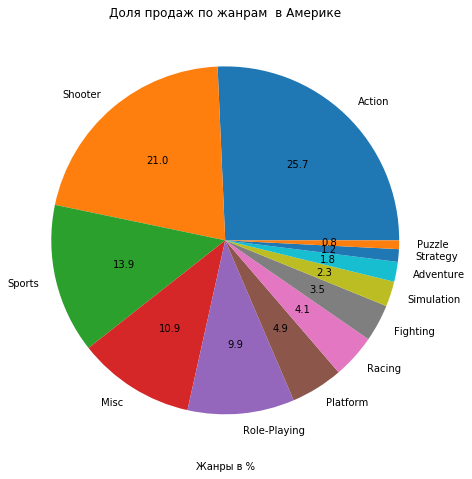

In [70]:
#  сгруппируем по жанрам и найдем сумму продаж в регионе
na_g = relevant_data.groupby('genre')['na_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж в жанре от всех продаж в данном регионе
na_g['share_na'] = na_g['sum'] * 100 / na_g['sum'].sum()

# выведем круговой график доли продаж определенного жанра от общего числа продаж в данном регионе
na_g['share_na'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по жанрам  в Америке")
plt.xlabel("Жанры в %") 
plt.ylabel("")
plt.show()

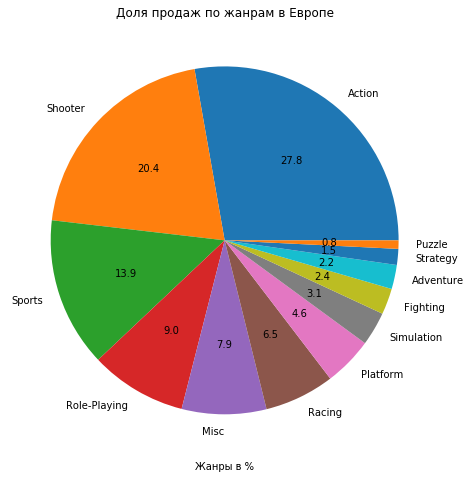

In [71]:
#  сгруппируем по жанрам и найдем сумму продаж в регионе
eu_g = relevant_data.groupby('genre')['eu_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж в жанре от всех продаж в данном регионе
eu_g['share_eu'] = eu_g['sum'] * 100 / eu_g['sum'].sum()

# выведем круговой график доли продаж определенного жанра от общего числа продаж в данном регионе
eu_g['share_eu'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по жанрам в Европе")
plt.xlabel("Жанры в %") 
plt.ylabel("")
plt.show()

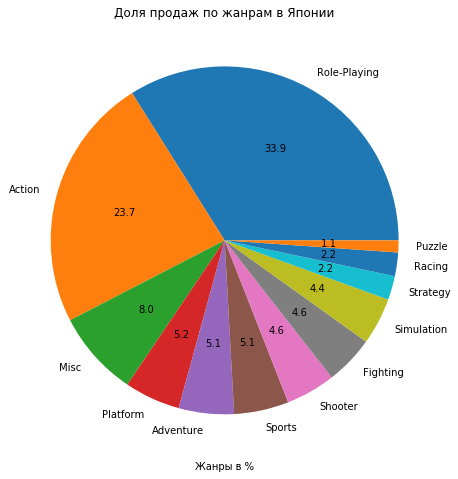

In [72]:
#  сгруппируем по жанрам и найдем сумму продаж в регионе
jp_g = relevant_data.groupby('genre')['jp_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж в жанре от всех продаж в данном регионе
jp_g['share_jp'] = jp_g['sum'] * 100 / jp_g['sum'].sum()

# выведем круговой график доли продаж определенного жанра от общего числа продаж в данном регионе
jp_g['share_jp'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по жанрам в Японии")
plt.xlabel("Жанры в %") 
plt.ylabel("")
plt.show()

В Америке и Европе предподчтения по жанрам похожи - по убыванию  "Action" - 25-27%, "Shooter"- 21%,"Sports", "Misc", "Role-Playing".   
В Японии предподчтения другие - "Role-Playing" - 34%, "Action" - 24% , "Misc", "Platform", "Adventure".   
В западных странах предпочитают стрелялки, а в Японии предпочитают бродилки, где много мистических героев.   

###### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

«E» («Everyone») — «Для всех»   
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»   
«T» («Teen») — «Подросткам»    
«M» («Mature») — «Для взрослых»

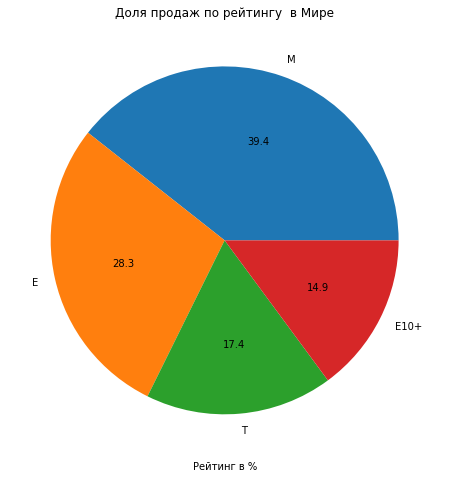

In [73]:
#  сгруппируем игры по рейтингу и найдем сумму продаж в регионе
sum_r = relevant_data.groupby('rating')['sum_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж по рейтингу от всех продаж в данном регионе
sum_r['share_sum'] = sum_r['sum'] * 100 / sum_r['sum'].sum()

# выведем круговой график доли продаж определенного рейтинга от общего числа продаж в данном регионе
sum_r['share_sum'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по рейтингу  в Мире")
plt.xlabel("Рейтинг в %") 
plt.ylabel("")
plt.show()

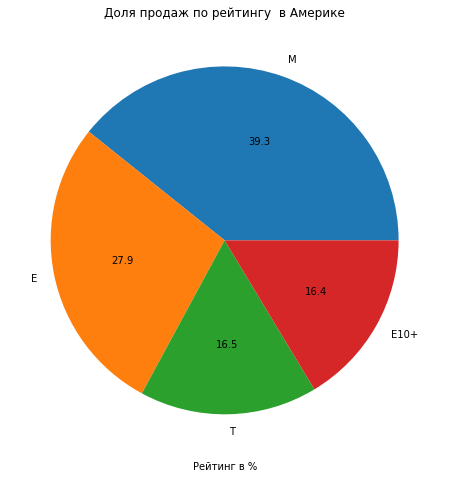

In [74]:
#  сгруппируем игры по рейтингу и найдем сумму продаж в регионе
na_r = relevant_data.groupby('rating')['na_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж по рейтингу от всех продаж в данном регионе
na_r['share_na'] = na_r['sum'] * 100 / na_r['sum'].sum()

# выведем круговой график доли продаж определенного рейтинга от общего числа продаж в данном регионе
na_r['share_na'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по рейтингу  в Америке")
plt.xlabel("Рейтинг в %") 
plt.ylabel("")
plt.show()

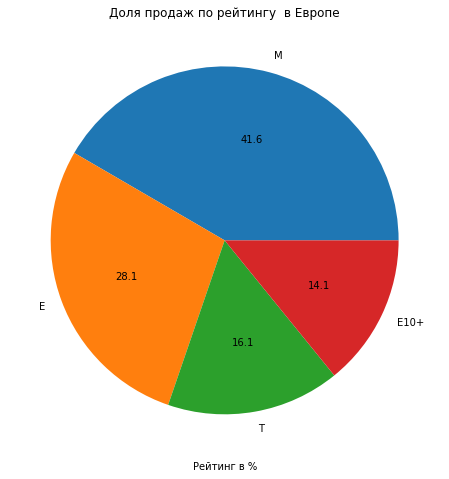

In [75]:
#  сгруппируем игры по рейтингу и найдем сумму продаж в регионе
eu_r = relevant_data.groupby('rating')['eu_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж по рейтингу от всех продаж в данном регионе
eu_r['share_eu'] = eu_r['sum'] * 100 / eu_r['sum'].sum()

# выведем круговой график доли продаж определенного рейтинга от общего числа продаж в данном регионе
eu_r['share_eu'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по рейтингу  в Европе")
plt.xlabel("Рейтинг в %") 
plt.ylabel("")
plt.show()

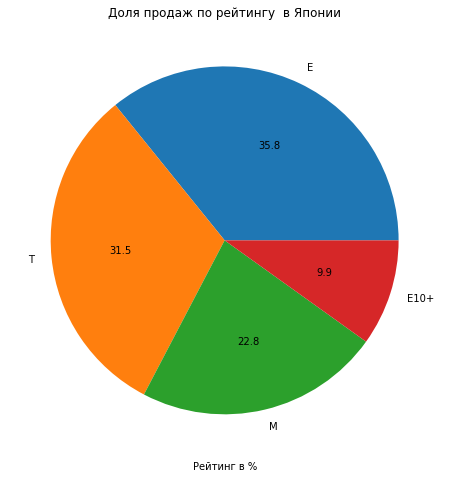

In [76]:
#  сгруппируем игры по рейтингу и найдем сумму продаж в регионе
jp_r = relevant_data.groupby('rating')['jp_sales'].agg(['count','sum']).sort_values('sum',ascending=False)

# в столбце посчитаем долю продаж по рейтингу от всех продаж в данном регионе
jp_r['share_jp'] = jp_r['sum'] * 100 / jp_r['sum'].sum()

# выведем круговой график доли продаж определенного рейтинга от общего числа продаж в данном регионе
jp_r['share_jp'].plot(kind='pie', figsize = (8,  8), autopct='%.1f')
plt.title("Доля продаж по рейтингу  в Японии")
plt.xlabel("Рейтинг в %") 
plt.ylabel("")
plt.show()

Если делить продажи по рейтингам, то продажи в Америке и Европе похожи на общие продажи в Мире, игр для «взрослых» продается около 40 %, «Для всех» - 28% . А вот в Японии другая картина «Для всех» - 36%, «Подросткам» -32%. Из этого можно сделать вывод, что в Америке и Европе играют во взрослые игры (как раз жанр стрелялок), как взрослые, так и подростки. В Японии в игры играют в основном молодежь, что можно увидеть по предподчтениям жанра и анализа рейтинга. Также велика вероятность, что в Японии к рейтингу относятся более серьезно и не нарушают возрастные категории.  

### Вывод

В Америке самые большие продажи наблюдались для X360, PS3, Wii. Но у этих приставок жизненный цикл подходит к концу и на смену им пришли набирающие популярность PS4, XOne. В Америке популярны стационарные приставки. Приставка XOne имеет в Америке 58% продаж. Здесь предпочитают жанры "Action", "Shooter","Sports". Рейтинг ESRB на продажи в Америке сильно не влияет.  

Для Европы самые большие продажи наблюдались для X360, PS3. Набирает популярность PS4. В отличии от Америки в Европе достаточно популярны игры для PC (компьютера). Продажи игр для PS4 составляет 45% от всех продаж. Предпочтения по жанрам схожи с американскими "Action", "Shooter","Sports". Рейтинг ESRB на продажи в Европе сильно не влияет.  

В Японии самые большие продажи для 3DS, PS3, PSP. В Японии популярны карманные приставки (4 из 5 топовых приставок). Прадажи игр для приставки 3DS составляет 39% от всех продаж, а вот продажи игр на XOne составляют всего 0.2% от мировых. В Японии предпочитают жанры "Role-Playing", "Action", "Misc". В Японии зависимость продаж и рейтинга ESRB отличается от мировой. Основные категори рейтинга «Для всех» - 36%  и «Подросткам» -32%, когда в мире преобладают игры для «взрослых».

### Шаг 5. Проверка гипотез <a id="cell5"></a>

###### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

рассмотрим гипотезу о равенстве средних двух генеральных совокупностей.    
Альтернативная гипотеза будет звучать:средние пользовательские рейтинги платформ Xbox One и PC не одинаковы

In [77]:
# почистим датасет от пропусков
data_user_score = data[~data['user_score'].isna()]

In [78]:
# Рассмотрим гипотезу,что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые
sample_xbox = data_user_score.query('platform == "XOne"')['user_score']
sample_pc = data_user_score.query('platform == "PC"')['user_score']

alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_xbox, 
    sample_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.5093157588521831e-05
Отвергаем нулевую гипотезу


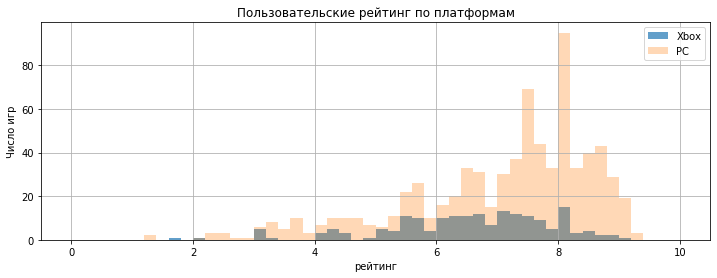

In [79]:
# построим гистограмму для двух сэмплов
sample_xbox.hist(bins=50,  figsize = (12,4),range=(0,10), alpha = 0.7, label = 'Xbox')
sample_pc.hist(bins=50,  figsize = (12,4),range=(0,10), alpha = 0.3, label = 'PC')
plt.title("Пользовательские рейтинг по платформам")
plt.xlabel("рейтинг")
plt.ylabel("Число игр")
plt.legend()
plt.show()

p-value стремится к 0. Мы отвергли нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Значит примем альтернативную гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC не одинаковы. Что отчетливо видно на гистограмме.

###### 5.2 Средние пользовательские рейтинги жанров Action  и Sports  разные.

нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые    
альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports разные

In [80]:
# в постановке задачи 0 гипотеза будет звучать так: равны ли средние пользовательские рейтинги жанров Action и Sports 
sample_action = data_user_score.query('genre == "Action"')['user_score']
sample_sports = data_user_score.query('genre == "Sports"')['user_score']

alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_action, 
    sample_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06701998404433748
Не получилось отвергнуть нулевую гипотезу


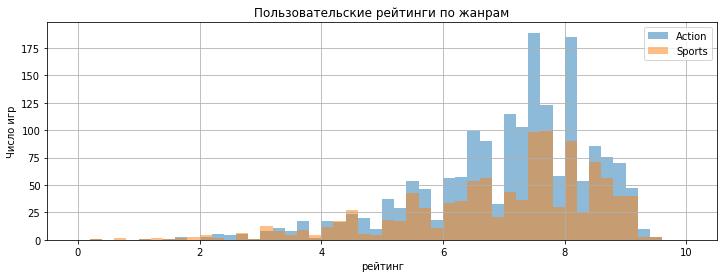

In [81]:
# построим гистограмму для двух сэмплов
sample_action.hist(bins=50,  figsize = (12,4),range=(0,10), alpha = 0.5, label = 'Action')
sample_sports.hist(bins=50,  figsize = (12,4),range=(0,10), alpha = 0.5, label = 'Sports')
plt.title("Пользовательские рейтинги по жанрам")
plt.xlabel("рейтинг")
plt.ylabel("Число игр")
plt.legend()
plt.show()

p-value равно 6.7 %. Нам не удалось опровергнуть нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports равны.  Альтернативную гипотезу, что средние пользовательские рейтинги жанров Action и Sports разные не рассматриваем. На графике видно, что рейтинги жанров Action и Sports схожи.

### Вывод

При рассмотрениие гипотез можно сделать вывод, что:   
- средние пользовательские рейтинги платформ Xbox One и PC не одинаковы;   
- средние пользовательские рейтинги жанров Action и Sports одинаковы.

### Шаг 6. Общий вывод <a id="cell6"></a>

Основной вопрос который мы задавали в начале исследования: "выявить определяющие успешность игры закономерности?"   

Общие закономерности:   
- платформа, желательно, не старше 7 лет, а лучше 3-5 лет на пике популярности(в нашем случае 3DS, PS4 и XOne);  
- платформа должна быть популярной (можно косвенно узнать число проданных приставок);   
- игры с высокой оценкой критиков и пользователей с большей вероятностью будут лучше продаваться;   
- среднее значение продаж одной игры в жанрах "Platform", "Shooter" самые большие. Возможно они не самые популярные, но хороших, успешных игр в этих жанрах больше;  

Закономерности для регионов.   
Америка:   
- популярны приставки PS4, XOne;   
- популярны жанры "Action", "Shooter","Sports";   

Европа:   
- популярны приставки PS4, XOne, PC;   
- популярны жанры "Action", "Shooter","Sports";  

Япония:   
- перспективные приставки 3DS, PSV, PS4;   
- популярны жанры "Role-Playing", "Action", "Misc";
- предподчтительный рейтинг игр ESRB «E»(«Для всех»), «T» («Подросткам»).